<a href="https://colab.research.google.com/github/mal-cul1830/data-science/blob/master/icu_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras

In [2]:
from google.colab import files
files.upload()

Saving heart.png to heart.png
Saving labels.csv to labels.csv
Saving Mortality_Prediction_ICU_ANN.ipynb to Mortality_Prediction_ICU_ANN.ipynb
Saving train.csv to train.csv


{'Mortality_Prediction_ICU_ANN.ipynb': b'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "metadata": {\n    "colab_type": "text",\n    "id": "uSjIWb7AbYRK"\n   },\n   "source": [\n    "**<h1> Mortality Predictions in ICU using ANN** \\n",\n    "    \\n",\n    "Patients admitted to the ICU suffer from critical illness or injury and are at high risk of dying. ICU mortality rates differ widely depending on the underlying disease process, with death rates as low as 1 in 20 for patients admitted following elective surgery, and as high as 1 in 4 for patients with respiratory diseases. The risk of death can be approximated by evaluating the severity of a patient\xe2\x80\x99s illness as determined by important physiologic, clinical, and demographic determinants."\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "![title](heart.png)"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 1,\n   "metadata": {\n    "colab": {\n     "base_uri": 

In [5]:
train = pd.read_csv('train.csv')
train.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,0.526667,14.923077,0,160.000000,27.000000,32.500000,70.810811,170.2,4,4.20,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,138.871212,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,0.560000,13.333333,1,125.500000,22.333333,28.655556,80.794118,175.3,2,3.90,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,0.500000,5.923077,0,134.333333,25.000000,28.460000,83.759259,170.2,3,4.26,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,0.526667,14.944444,1,117.333333,27.666667,37.442857,70.983333,180.3,3,4.00,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,138.871212,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,0.526667,15.000000,0,102.500000,19.000000,29.550000,74.958333,170.2,3,4.32,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,138.871212,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [8]:
labels = pd.read_csv('labels.csv')

In [13]:
train.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [15]:
train.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,106.243369,11.615267,35.335834,137.087758,23.674534,31.424746,87.122729,169.945036,36.175544,4.136466,2.145524,80.449634,1.0,2.017580,57.209247,76.101723,117.045472,138.861354,40.255572,180.324554,204.987649,137605.348587,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,3858.226228,3.235578,2198.997715,39.938339,4.178864,4.510583,14.550804,14.805887,2113.064930,0.522405,1.792110,11.656091,0.0,0.304457,10.925580,11.306395,18.226100,4.053181,7.012932,2188.040909,102.494600,2922.264561,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,0.276000,1.000000,0.000000,49.000000,9.125000,16.600000,3.000000,1.800000,1.000000,2.500000,0.400000,2.000000,1.0,1.100000,0.000000,0.000000,0.000000,111.500000,16.000000,26.000000,8.200000,132539.000000,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,0.500000,9.307692,0.000000,112.250000,21.333333,28.300000,77.270209,170.200000,2.000000,3.800000,1.784524,75.481103,1.0,1.840000,50.492031,69.111667,105.812937,136.500000,37.333333,116.900000,137.450000,135078.000000,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,0.526667,12.428571,1.000000,129.800000,23.666667,30.630952,86.274510,170.200000,3.000000,4.075000,1.900000,78.934007,1.0,2.000000,56.280788,74.751250,115.366987,139.000000,39.666667,138.871212,187.200000,137589.000000,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,0.562500,14.750000,1.000000,152.250000,26.000000,34.017143,96.473258,170.200000,4.000000,4.400000,2.000000,83.204416,1.0,2.150000,63.166667,81.739195,126.645833,141.000000,42.000000,163.732143,246.900000,140099.500000,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,141264.000000,15.000000,139060.000000,467.333333,96.000000,61.050000,137.842105,431.800000,133628.000000,16.000000,85.000000,265.000000,1.0,6.900000,107.500000,132.540000,234.000000,164.533333,158.000000,138477.000000,925.666667,142673.000000,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [26]:
final = pd.concat([train, labels], axis = 1)
final.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,0.526667,14.923077,0,160.000000,27.000000,32.500000,70.810811,170.2,4,4.20,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,138.871212,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,0.560000,13.333333,1,125.500000,22.333333,28.655556,80.794118,175.3,2,3.90,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,0.500000,5.923077,0,134.333333,25.000000,28.460000,83.759259,170.2,3,4.26,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,0.526667,14.944444,1,117.333333,27.666667,37.442857,70.983333,180.3,3,4.00,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,138.871212,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,0.526667,15.000000,0,102.500000,19.000000,29.550000,74.958333,170.2,3,4.32,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,138.871212,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [28]:
final.corr()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
ALP,1.000000,0.114850,0.155750,0.000879,-0.137771,0.155416,0.240297,-0.006795,0.131899,-0.035320,-0.003474,0.020718,-0.002758,0.014560,-0.095050,-0.010624,0.026164,-0.014689,-0.002739,0.018410,0.047983,-0.017456,NaN,0.047530,-0.011555,-0.031432,-0.041680,-0.033741,-0.038665,-0.004341,0.071202,0.013645,-0.008747,-0.024257,-0.052407,-0.051107,-0.011932,-0.019689,-0.040027,0.085952,-0.021914,-0.005073,0.115577
ALT,0.114850,1.000000,0.858741,-0.112012,-0.009850,0.038541,0.109332,-0.024351,0.077210,0.024430,-0.003840,-0.073180,-0.002251,0.049459,-0.088142,0.047127,0.091215,0.012009,-0.002238,-0.004501,0.193083,0.021525,NaN,0.029570,0.023721,0.011535,-0.006403,0.021272,-0.078684,-0.003155,-0.077499,0.026546,0.019284,-0.067018,-0.050335,-0.017507,-0.011350,0.037490,-0.048773,0.013325,-0.001541,-0.004561,0.070992
AST,0.155750,0.858741,1.000000,-0.088649,-0.037277,0.051244,0.127767,-0.020751,0.092024,0.030425,-0.003814,-0.123846,-0.002259,0.076040,-0.117626,0.022552,0.104572,0.016882,-0.002260,0.031697,0.282596,-0.000306,NaN,0.042236,-0.000169,-0.018653,-0.031567,0.021510,-0.089867,-0.003046,-0.084033,0.018264,0.014621,-0.095091,-0.053931,-0.014374,-0.012664,0.081825,-0.064821,0.032749,0.008551,-0.001068,0.108484
Age,0.000879,-0.112012,-0.088649,1.000000,-0.036231,0.228768,-0.063837,-0.010103,0.033369,-0.263634,-0.011746,0.027736,-0.020055,0.057239,0.008126,-0.065288,-0.246909,-0.088042,0.021302,0.081105,-0.018507,-0.114144,NaN,0.143433,-0.264847,-0.182128,-0.003619,0.003085,-0.023488,-0.003788,-0.023755,-0.019319,0.069773,0.021496,0.009608,-0.146972,0.043898,0.051547,-0.255105,0.034414,-0.177945,0.025433,0.130701
Albumin,-0.137771,-0.009850,-0.037277,-0.036231,1.000000,-0.100987,-0.086068,0.058119,-0.030867,0.077583,0.001028,0.144026,-0.000094,0.030054,0.182131,0.228917,-0.137857,0.018550,-0.000138,-0.049365,-0.066734,0.091947,NaN,0.028930,0.185396,0.199239,0.172102,0.031793,0.075239,0.001884,0.019028,0.019584,-0.024060,0.035633,0.103017,0.006044,0.009577,0.039915,0.102044,-0.099285,0.000732,0.007397,-0.126925
BUN,0.155416,0.038541,0.051244,0.228768,-0.100987,1.000000,0.185473,-0.014453,0.683278,-0.119703,-0.009474,-0.031887,-0.004939,0.126179,-0.236730,-0.096426,-0.060862,0.023661,-0.004988,0.264277,0.037174,-0.080205,NaN,0.299111,-0.129948,-0.117328,-0.039398,0.033020,-0.057482,-0.006133,-0.034506,-0.033135,0.000831,-0.037919,-0.042018,-0.182530,0.072952,0.042128,-0.195167,0.101356,0.079346,-0.007620,0.223369
Bilirubin,0.240297,0.109332,0.127767,-0.063837,-0.086068,0.185473,1.000000,-0.017119,0.140630,-0.031563,-0.004779,-0.042079,-0.002749,-0.029639,-0.132563,-0.040429,0.019632,0.012634,-0.002727,-0.020082,0.103735,-0.032284,NaN,0.128935,-0.016910,-0.043218,-0.046814,-0.075726,-0.099564,-0.004365,-0.146147,-0.022028,-0.017754,-0.003182,-0.053594,-0.091075,-0.007221,-0.016851,-0.076323,0.018515,0.033972,-0.006371,0.174017
Cholesterol,-0.006795,-0.024351,-0.020751,-0.010103,0.058119,-0.014453,-0.017119,1.000000,-0.023809,0.072380,-0.299331,0.010350,0.001810,0.039647,0.020805,0.074143,-0.040332,0.006758,0.001792,0.012194,0.002234,0.027633,NaN,0.026229,0.022331,0.016719,0.002373,-0.020135,0.010901,0.002261,0.003008,-0.175844,-0.009600,0.008578,0.011681,0.014865,-0.021201,0.036640,0.013926,-0.010553,-0.012247,-0.004304,-0.008578
Creatinine,0.131899,0.077210,0.092024,0.033369,-0.030867,0.683278,0.140630,-0.023809,1.000000,-0.072456,-0.008805,-0.021087,-0.004057,0.037075,-0.237834,-0.057180,-0.032015,0.047051,-0.004856,0.285873,0.047987,-0.054207,NaN,0.158568,-0.027824,-0.008492,0.028857,-0.050621,-0.090957,-0.007304,-0.034072,-0.027901,-0.013689,-0.019475,-0.030945,-0.108552,0.034726,0.047885,-0.162525,0.032108,0.091286,0.006364,0.117615
DiasABP,-0.03532

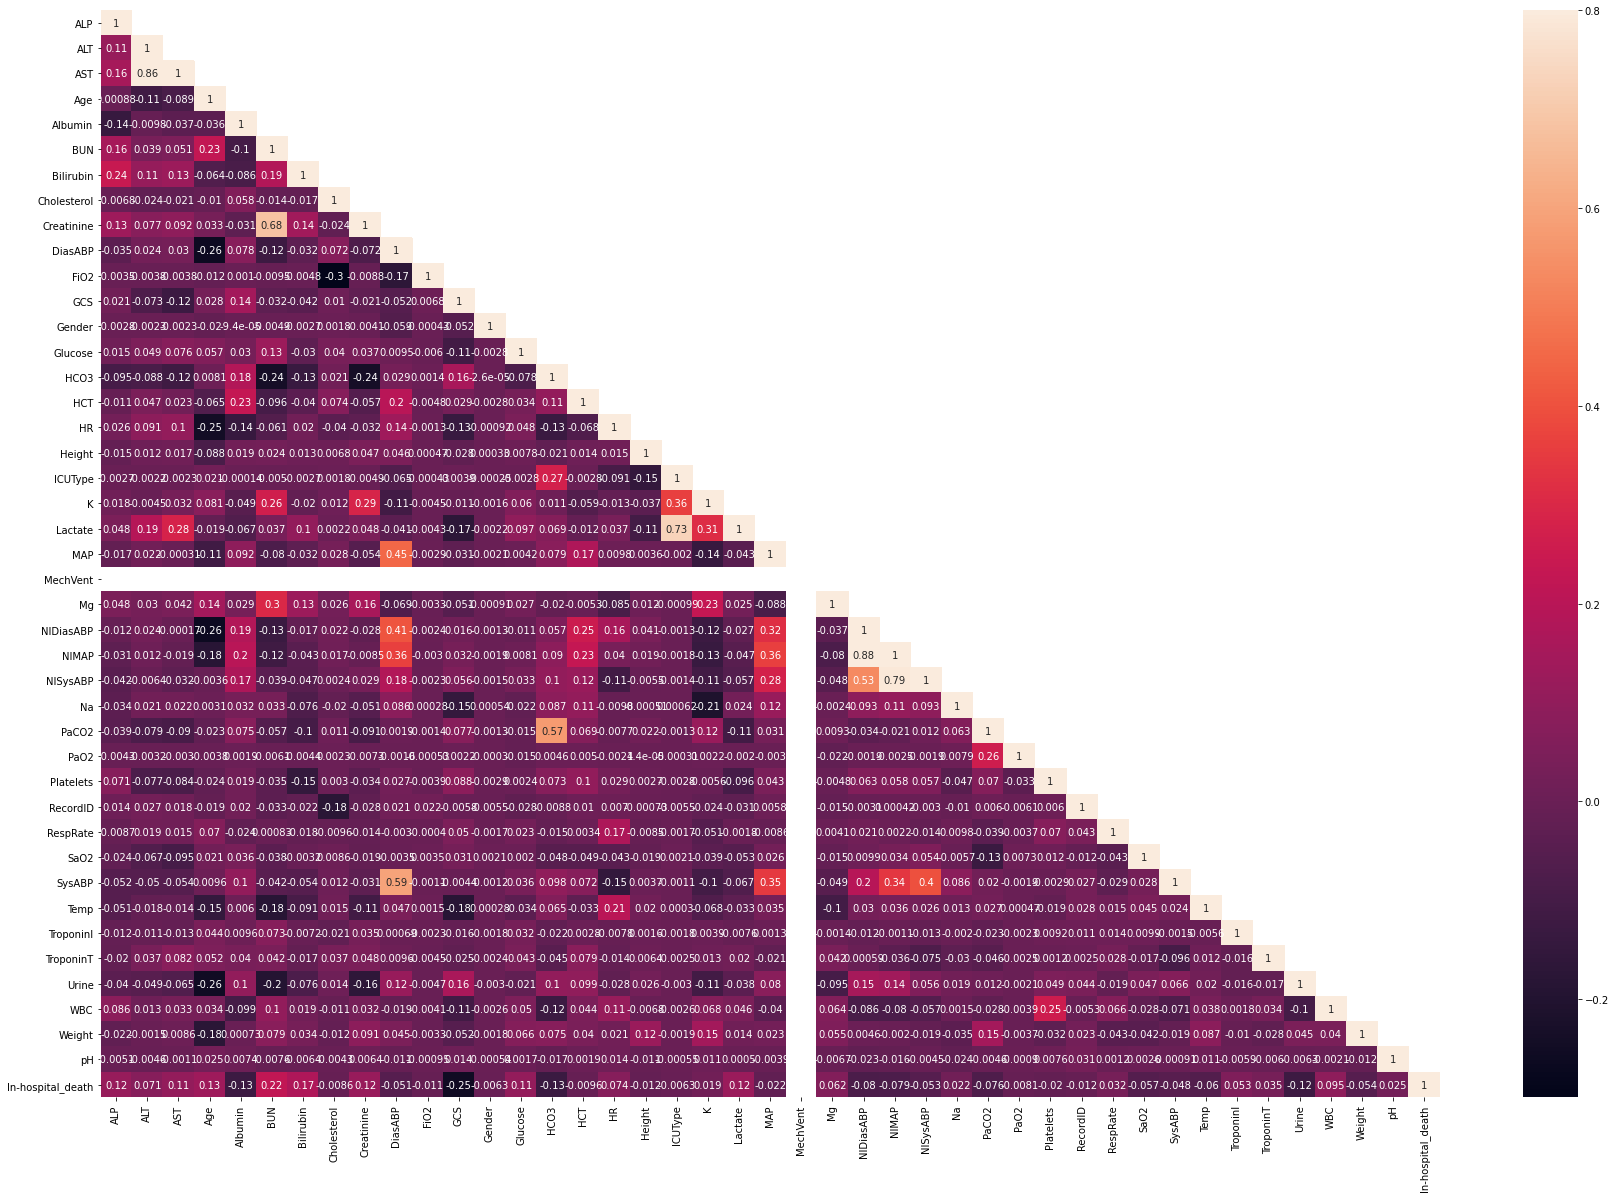

In [123]:
corr_map = final.corr()
corr_obj = np.array(corr_map)
corr_obj[np.tril_indices_from(corr_obj)] = False


fig, ax = plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(corr_map, vmax = 0.8, mask = corr_obj, annot = True)
plt.show()

Noting that the following columns have a very low correlation with In-hospital deaths:


*   Cholesterol
*   Gender
*   ICUType
*   HCT
*   PaO2
*   Height


In [125]:
mod = final.drop(['In-hospital_death','Cholesterol', 'Gender', 'ICUType', 'HCT', 'PaO2'], axis = 1)
mod.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Creatinine,DiasABP,FiO2,GCS,Glucose,HCO3,HR,Height,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,0.750000,58.795833,0.526667,14.923077,160.000000,27.000000,70.810811,170.2,4.20,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,1.100000,58.897059,0.560000,13.333333,125.500000,22.333333,80.794118,175.3,3.90,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,0.333333,67.125000,0.500000,5.923077,134.333333,25.000000,83.759259,170.2,4.26,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,0.766667,58.795833,0.526667,14.944444,117.333333,27.666667,70.983333,180.3,4.00,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,1.000000,58.795833,0.526667,15.000000,102.500000,19.000000,74.958333,170.2,4.32,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [128]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
mod_scale = mms.fit_transform(mod)
mod_scale

array([[0.04451039, 0.00306331, 0.002552  , ..., 0.07438017, 0.25821577,
        0.00880051],
       [0.04451039, 0.00306331, 0.002552  , ..., 0.08142927, 0.2602718 ,
        0.00886374],
       [0.07121662, 0.00875232, 0.01234529, ..., 0.033544  , 0.17942664,
        0.00968193],
       ...,
       [0.02670623, 0.00185987, 0.0008932 , ..., 0.07997083, 0.35581788,
        0.00887737],
       [0.1075097 , 0.21530719, 0.10714134, ..., 0.09425134, 0.28296796,
        0.00903556],
       [0.02191281, 0.00169576, 0.00765599, ..., 0.06656712, 0.28444819,
        0.00813227]])

In [129]:
x = mod_scale

In [132]:
Y = final['In-hospital_death']
y = []
for i in Y:
  if i:
    y.append([1,0])
  else:
    y.append([0,1])

y = np.array(y)
print(y)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [0 1]]


In [133]:
print("Shape of x: ",x.shape, " ;   Shape of y: ", y.shape)

Shape of x:  (3999, 37)  ;   Shape of y:  (3999, 2)


In [135]:
xtr, xte, ytr, yte = train_test_split(x,y,test_size = 0.2, shuffle = True)

In [139]:
ytr

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [140]:
print("Shape of xtr(train): ",xtr.shape, " ;   Shape of ytr(train): ", ytr.shape)
print("Shape of xte(test): ",xte.shape, " ;   Shape of yte(test): ", yte.shape)

Shape of xtr(train):  (3199, 37)  ;   Shape of ytr(train):  (3199, 2)
Shape of xte(test):  (800, 37)  ;   Shape of yte(test):  (800, 2)


In [145]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.optimizers import Adam

In [154]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = xtr.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(156, activation='relu'))
model.add(Dense(190, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(220, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.001),loss = ['binary_crossentropy'], metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_37 (Dense)             (None, 156)               20124     
_________________________________________________________________
dense_38 (Dense)             (None, 190)               29830     
_________________________________________________________________
batch_normalization_5 (Batch (None, 190)               760       
_________________________________________________________________
dense_39 (Dense)             (None, 220)               42020     
_________________________________________________________________
dense_40 (Dense)             (None, 256)              

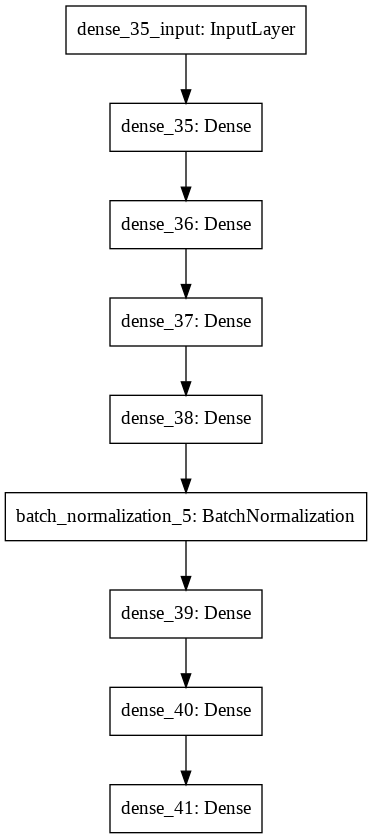

In [155]:
keras.utils.plot_model(model)

In [156]:
result = model.fit(xtr, ytr, epochs = 15, batch_size = 128, validation_data=(xte, yte))

Epoch 1/15
25/25 [==============================] - 0s 15ms/step - loss: 0.3923 - accuracy: 0.8465 - val_loss: 0.5728 - val_accuracy: 0.8537
Epoch 2/15
25/25 [==============================] - 0s 8ms/step - loss: 0.3173 - accuracy: 0.8700 - val_loss: 0.4810 - val_accuracy: 0.8537
Epoch 3/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3093 - accuracy: 0.8740 - val_loss: 0.4763 - val_accuracy: 0.8537
Epoch 4/15
25/25 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8725 - val_loss: 0.4993 - val_accuracy: 0.8537
Epoch 5/15
25/25 [==============================] - 0s 9ms/step - loss: 0.2922 - accuracy: 0.8746 - val_loss: 0.4597 - val_accuracy: 0.8537
Epoch 6/15
25/25 [==============================] - 0s 9ms/step - loss: 0.2897 - accuracy: 0.8787 - val_loss: 0.4607 - val_accuracy: 0.8537
Epoch 7/15
25/25 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.8806 - val_loss: 0.5018 - val_accuracy: 0.8575
Epoch 8/15
25/25 [=

In [ ]:
dat = final[['Age','In-hospital_death']].loc[final['In-hospital_death'] == 1].sort_values(by='Age').groupby(['Age']).count()

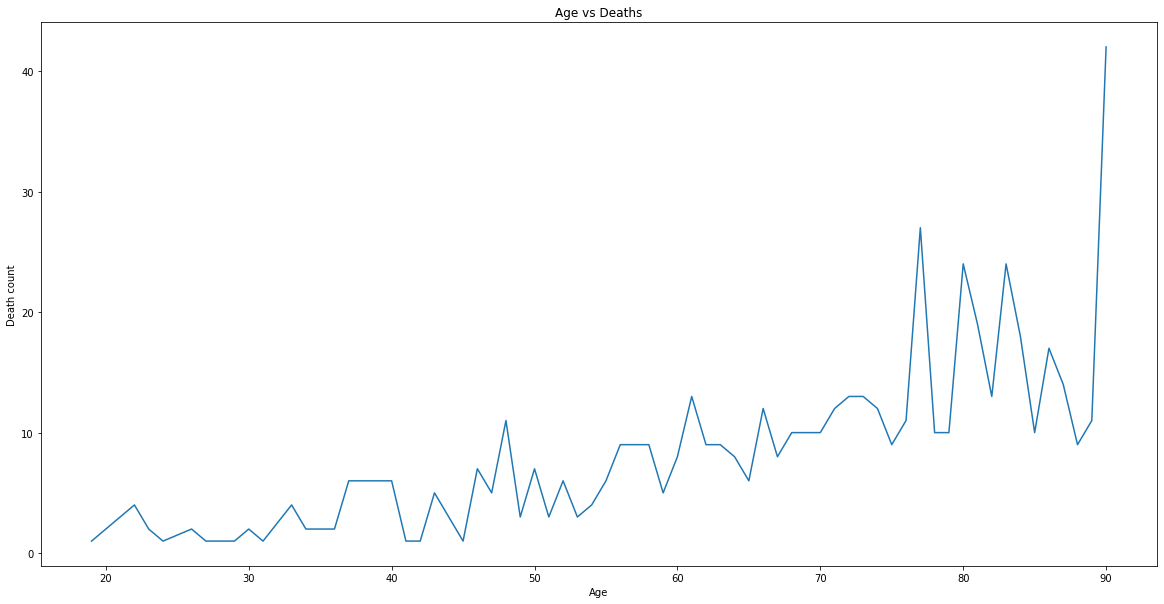

In [116]:
plt.figure(figsize=(20,10))
plt.title('Age vs Deaths')
plt.xlabel('Age')
plt.ylabel('Death count')
plt.plot(dat.index, dat.values)
plt.show()

ValueError: ignored

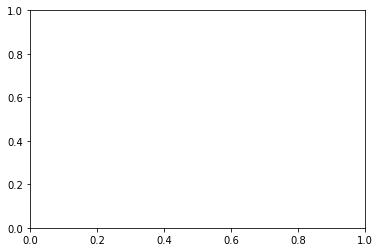

In [84]:
plt.plot(x)

In [61]:
np.array(final[['Age','In-hospital_death']].where(final['In-hospital_death'] == 1)['Age'])

array([nan, nan, nan, ..., nan, 37., nan])